<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/lab1_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ТЗ к Лабораторной работе №1:**

Выбрать две тестовые функции для оптимизации и визуализировать их;

Реализовать метод GD для функции;

Реализовать метод GD с моментной модификацией для функции;

Реализовать метод GD с модификацией ADAM для функции.

In [69]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la
from datetime import datetime

Задаем функцию Химмельблау

In [70]:
class Himmelblau():
  @staticmethod
  def fuction(x):
        return (x[0] * x[0] + x[1] - 11) ** 2 + (x[0] + x[1] * x[1] - 7) ** 2

  @staticmethod
  def get_bounds():
    return np.array([[-5, -5], [5, 5]])
    
  @staticmethod
  def get_min():
        return np.array([3., 2., 0.])
  
  @staticmethod
  def gradient(x):
        return np.array([4 * x[0] * (x[0] * x[0] + x[1] - 11) + 2 * (x[0] + x[1] * x[1] - 7), 4 * x[1] * (x[1] * x[1] + x[0] - 7) + 2 * (x[1] + x[0] * x[0] - 11)])

Задаем функцию Матьяса

In [71]:
class Matyas():
  @staticmethod
  def fuction(x):
        return 0.26*(x[0]*x[0] + x[1]*x[1])-0.48*x[0]*x[1]

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])
    
  @staticmethod
  def get_min():
        return np.array([0., 0., 0.])
  
  @staticmethod
  def gradient(x):
        return np.array([0.52*x[0] - 0.48 * x[1], 0.52*x[1] - 0.48 * x[0]])

Функция визуализации

In [72]:
def draw_result(func: callable, bounds: np.array, glob_min: np.array, history: np.array, title: str) -> None:

    """Визуализация градиентного спуска

    Args:
        func (callable): функция искуственного ландшафта
        bounds (np.array): область определения функции
        glob_min (np.array): глобальный минимум функции
        history (np.array): история градиентного спуска
        title (str): содержание заголовка
    """

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')
    
    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)
    
    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = func(np.array([x_grid, y_grid]))
    
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)    
    ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
    ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=250, c="white", lw=2, ec='black', marker = '.')
    ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=250, c="white", lw=2, ec='black', marker = '*')

    np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
    print(f"Начальная точка:\t{history[0]}")
    np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
    print(f"Найденный минимум:\t{history[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    print(f"Кол-во итераций:\t{len(history)}")
    fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(history)}", horizontalalignment="right", fontsize = 12)

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

Дефолтный GD

In [73]:
def my_GD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001
    ) -> np.array:

    """Дефолтный градиентный спуск

    Args:
        func (callable): функция искуственного ландшафта
        start_params (np.ndarray): стартовый набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    
    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # новое значение параметров
        params = params - lr * grad(params)

        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

Himmelblau default sgd
 0:00:00.007273
Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 1.23e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	247


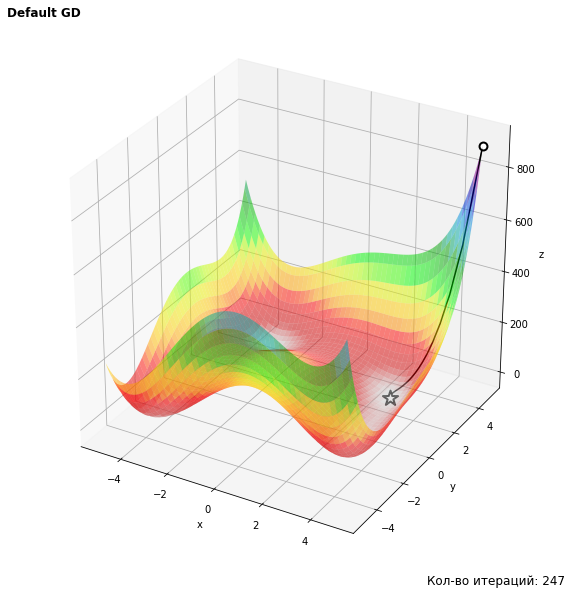

In [74]:
# Для Химмельблау
start_time = datetime.now()
history = my_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.001)
print("Himmelblau default sgd\n", datetime.now() - start_time)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), history, "Default GD")

Matyas default sgd
 0:00:00.025898
Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-3.63e-02 -3.63e-02 5.28e-05]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	1001


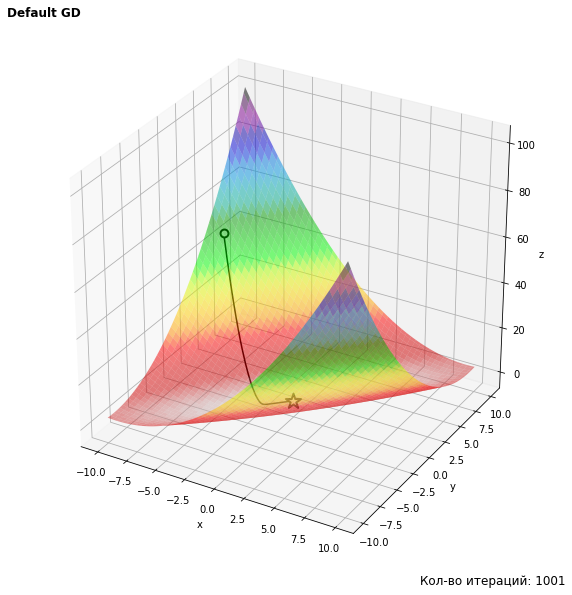

In [75]:
# Для Матьяса
start_time = datetime.now()
history = my_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
print("Matyas default sgd\n", datetime.now() - start_time)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), history, "Default GD")

Моментная модификация GD

In [76]:
def momentum_GD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001, beta: float = 0.5
    ) -> np.array:
    
    """Градиентный спуск с моментной модификацией

    Args:
        func (callable): функция искуственного ландшафта
        start_params (np.ndarray): начальный набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.
        beta (float, optional): Коэффициент энертности. Defaults to 0.5.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params_prev = start_params.copy()
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    
    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # новое значение параметров
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev = params
        params = params_new
        
        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

Himmelblau inertial sgd
 0:00:00.006582
Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 1.24e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	111


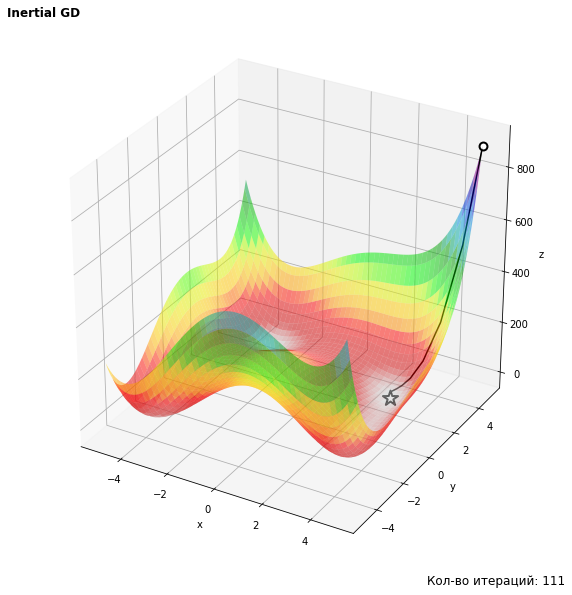

In [77]:
# Для Химмельблау
start_time = datetime.now()
history = momentum_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.001)
print("Himmelblau inertial sgd\n", datetime.now() - start_time)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), history, "Inertial GD")

Matyas inertial sgd
 0:00:00.031946
Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-7.04e-04 -7.04e-04 1.98e-08]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	984


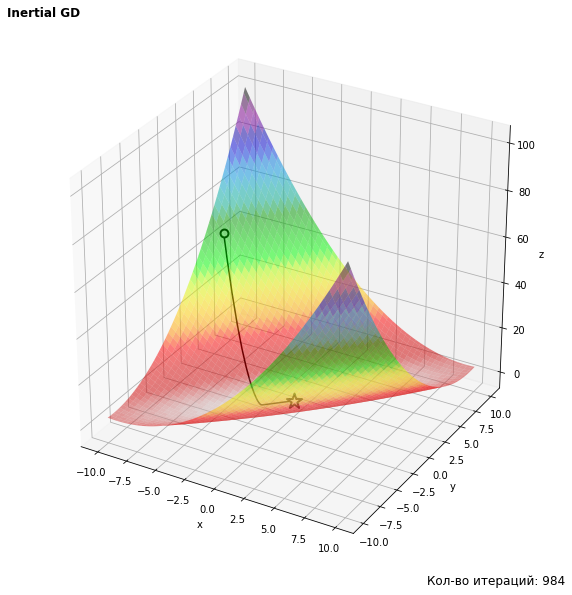

In [78]:
# Для Матьяса
start_time = datetime.now()
history = momentum_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
print("Matyas inertial sgd\n", datetime.now() - start_time)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), history, "Inertial GD")

Adam GD

In [79]:
def Adam_GD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, max_iter: int = 1000, 
    lr: float = 0.1, b1: float = 0.6, b2: float = 0.999, e: float = 10e-8, delta: float = 0.001
    ) -> np.array:
    
    """Адаптивный градиентный спуск: Adam

    Args:
        func (callable): функция искуственного ландшавта
        start_params (np.ndarray): стартовый набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        b1 (float, optional): параметр beta1. Defaults to 0.6.
        b2 (float, optional): параметр beta2. Defaults to 0.999.
        e (float, optional): "бесконечно" малое число. Defaults to 10e-8.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    # инициализация моментов
    m = np.array([0, 0])
    v = np.array([0, 0])
    
    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):
        
        # считаем моменты
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2

        # новое значение параметров
        params = params - lr * m / (np.sqrt(v) + e)
        
        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

Himmelblau Adam sgd
 0:00:00.002216
Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 2.80e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	32


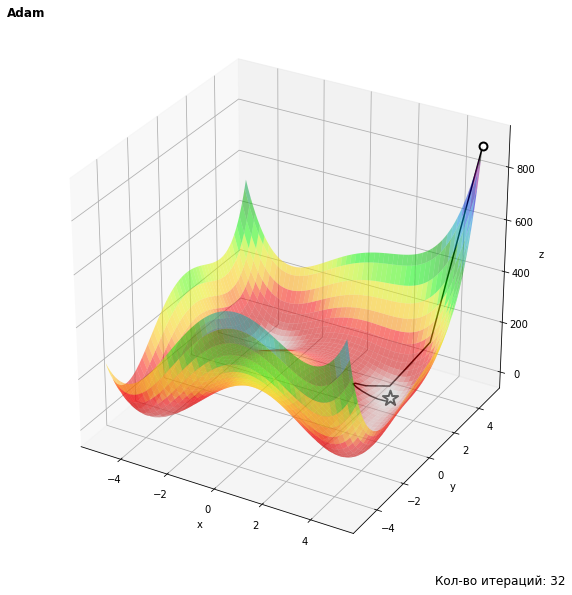

In [80]:
# Для Химмельблау
start_time = datetime.now()
history = Adam_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.1)
print("Himmelblau Adam sgd\n", datetime.now() - start_time)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), history, "Adam")

Matyas Adam sgd
 0:00:00.025543
Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-6.99e-04 -6.98e-04 1.95e-08]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	575


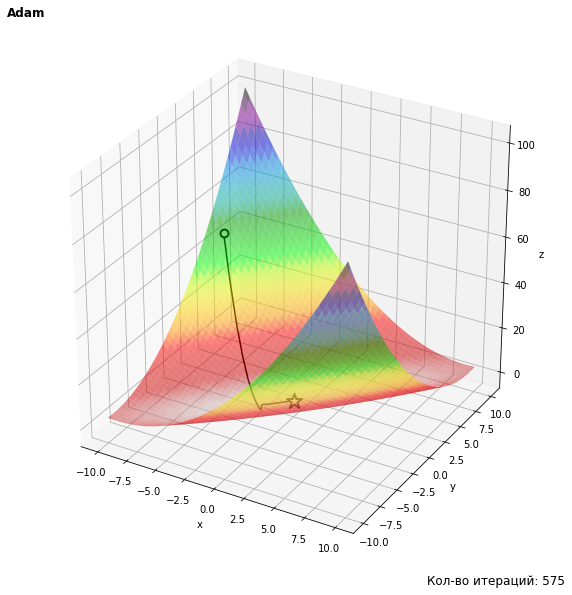

In [81]:
# Для Матьяса
start_time = datetime.now()
history = Adam_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
print("Matyas Adam sgd\n", datetime.now() - start_time)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), history, "Adam")